In [17]:
import pandas as pd
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')

### Self-sim by layer comparison

In [18]:
selfsim_1 = pd.read_csv('self_sim_by_layer_ccoha1.csv', delimiter=',')

In [20]:
selfsim_2 = pd.read_csv('self_sim_by_layer_ccoha2.csv', delimiter=',')

In [21]:
selfsim_1.loc[selfsim_1['word'] == 'attack_nn']

,word,instances,1,2,3,4,5,6,7,8,9,10,11,12
23,attack_nn,436,0.862684,0.818299,0.771371,0.721963,0.724305,0.694459,0.664998,0.651697,0.609386,0.602729,0.645785,0.644255


In [22]:
selfsim_2.loc[selfsim_2['word'] == 'attack_nn']

,word,instances,1,2,3,4,5,6,7,8,9,10,11,12
16,attack_nn,803,0.845348,0.763627,0.726025,0.674672,0.673,0.641793,0.607344,0.592343,0.553416,0.541538,0.581168,0.583647


In [23]:
def compare_plots(word_title):
    # Dataset
    x = np.array([i for i in range(1, 13)])
    y1 = np.array(selfsim_1.loc[selfsim_1['word'] == word_title].drop(['word', 'instances'], axis=1).values[0])
    y2 = np.array(selfsim_2.loc[selfsim_2['word'] == word_title].drop(['word', 'instances'], axis=1).values[0])

 
    cubic_model1 = interp1d(x, y1, kind = "cubic")
    cubic_model2 = interp1d(x, y2, kind = "cubic")

    X_ = np.linspace(x.min(), x.max(), 500)
    Y1_= cubic_model1(X_)
    Y2_= cubic_model2(X_)


    plt.plot(X_, Y1_)
    plt.plot(X_, Y2_, 'r')
    plt.title(f"Self-sim for {word_title}. Blue — ccoha1, red — ccoha2")
    plt.xlabel("layer")
    plt.ylabel("self-similarity")
    plt.show()
    

Сравним графики, отражающие изменение метрики self-similarity на 12 слоях (синий — CCOHA1, красный — COOHA2). Для некоторых слов действительно можно определить наличие или отсутствие semantic change

Например, для слова **face** графики расположены очень близко друг к другу, из-за чего можно предположить, что семантических изменений для данного слова не было:

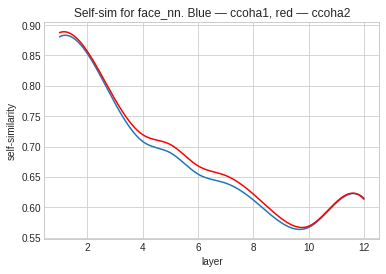

In [24]:
compare_plots('face_nn') # 0

А для **attack** заметно явное различие между метриками:

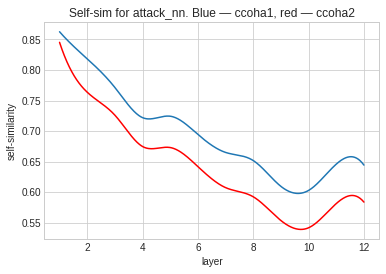

In [25]:
compare_plots('attack_nn') # 1

Для слова donkey тоже хорошо заметно отсутствие семантических изменений:

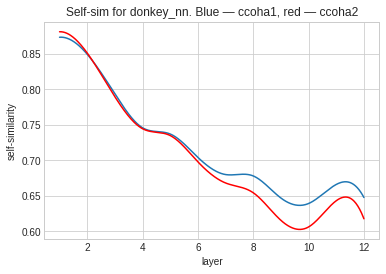

In [26]:
compare_plots('donkey_nn') # 0

Если анализировать графики для слова thump, то в новом корпусе это слово стало "менее многозначным" 
p.s. не знаю, так ли это на самом деле

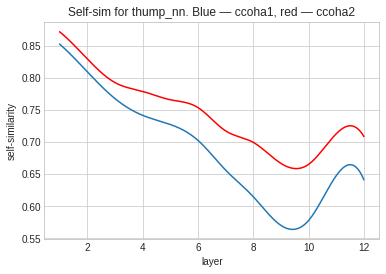

In [27]:
compare_plots('thump_nn') # 1

Для слова record также отчетливо видны изменения — с корпусе 2 это слово стало более многозначным:

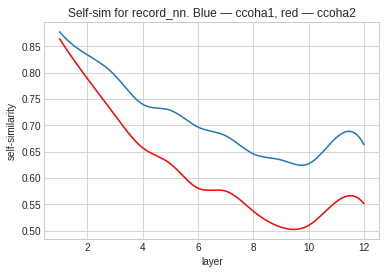

In [28]:
compare_plots('record_nn') # 1

Для слова player также заметны различия между значениями self-similarity, особенно на 6-8 слоях:

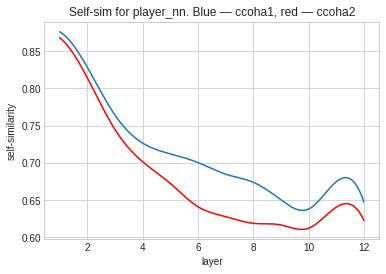

In [29]:
compare_plots('player_nn') # 1

#### Ошибочные/непонятные случаи 

Для слова circle (который в binary.txt обладает сем. изменением), графики достаточно близко расположены друг к другу, из-за чего можно сделать ошибочный вывод, что сем. изменений не было:

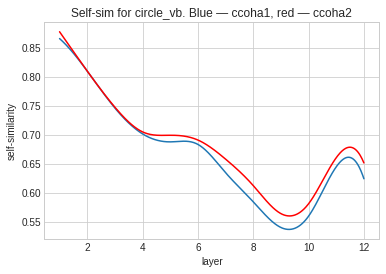

In [30]:
compare_plots('circle_vb') # 1

Та же ситуация со словом head:

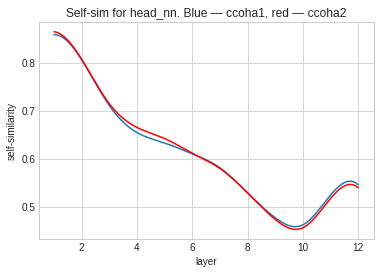

In [31]:
compare_plots('head_nn') # 1

Согласно метрике, слово plane было "менее многозначным" в корпусе 2. Это не очень логично, так как корпус 2 более новый и содержит слово plane в значении *самолет*.

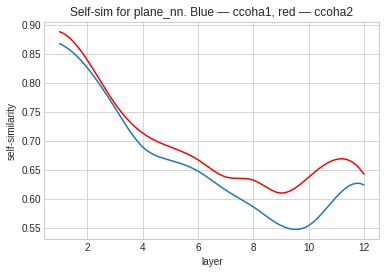

In [32]:
compare_plots('plane_nn') # 1